In [ ]:
!pip install youtube-transcript-api

In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi

In [ ]:
youtube_video = "https://www.youtube.com/watch?v=mG7utna2Ai0"

In [ ]:
video_id = youtube_video.split("=")[1]

In [ ]:
video_id

'mG7utna2Ai0'

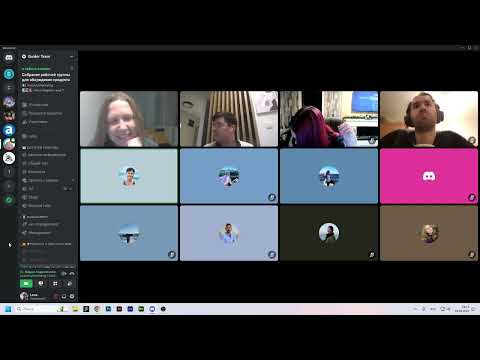

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
transcript_list = YouTubeTranscriptApi.list_transcripts(video_id)

In [ ]:
transcript = transcript_list.find_transcript(['ru', 'en'])

In [ ]:
print(transcript)

ru ("Russian (auto-generated)")[TRANSLATABLE]


In [ ]:
transcript.fetch()

[{'text': 'лазу а микрофон не один подожди', 'start': 0.76, 'duration': 7.24},
 {'text': 'громкость на максимуме', 'start': 4.44, 'duration': 3.56},
 {'text': 'здесь помимо презентации у кого ещё чего',
  'start': 24.119,
  'duration': 6.56},
 {'text': 'теги насколько я понимаю надо обсудить',
  'start': 28.08,
  'duration': 4.359},
 {'text': 'как Да ещё у меня есть несколько',
  'start': 30.679,
  'duration': 4.001},
 {'text': 'вопросов которые мне Ангелина передала',
  'start': 32.439,
  'duration': 4.12},
 {'text': 'вот там на разные', 'start': 34.68, 'duration': 6.8},
 {'text': 'темы Да у нас основная повез - это',
  'start': 36.559,
  'duration': 4.921},
 {'text': 'теги значит Sounds Open Sound', 'start': 42.879, 'duration': 7.441},
 {'text': 'settings Нет не то как там попасть в эти',
  'start': 46.96,
  'duration': 7.599},
 {'text': 'настройки блин звука о попало Так что у',
  'start': 50.32,
  'duration': 5.6},
 {'text': 'нас тут', 'start': 54.559, 'duration': 5.361},
 {'text':

In [ ]:
transcript = transcript.fetch()

In [ ]:
full_text = ' '.join([entry['text'] for entry in transcript])

In [ ]:
print(full_text)

лазу а микрофон не один подожди громкость на максимуме здесь помимо презентации у кого ещё чего теги насколько я понимаю надо обсудить как Да ещё у меня есть несколько вопросов которые мне Ангелина передала вот там на разные темы Да у нас основная повез - это теги значит Sounds Open Sound settings Нет не то как там попасть в эти настройки блин звука о попало Так что у нас тут recording микрофон Ну вообще у меня вот так лучше стало поменялось ничего не поменялось Ты просто отдалённый чуть-чуть Глухо Сейчас погоди нет Ой здесь можно смайлики А в нашем во общем нельзя а кто-то хорошо меня слышит а Так ну-ка подождите кто меня плохо слышит а кто Хорошо я вот хорошо все слышат одинаково тебя плохо одинаково плохо Нет я хорошо прямо слышу мне нормально но я выкрутилась сильней У меня просто если вык громкость остальные просто кричат мне в ухо нене можно на одном выключить Ну да но ладно всё равно плохо всё равно не очень мотивация Глухова то Да я выкрутил на полную тебя Мари но всё равно не 

In [ ]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

68608


In [ ]:
from transformers import pipeline

In [ ]:
summarizer = pipeline('summarization', model='d0rj/ru-mbart-large-summ')

config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

C:\Users\zhuko\anaconda3\lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\zhuko\.cache\huggingface\hub\models--d0rj--ru-mbart-large-summ. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/703k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.95M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/880 [00:00<?, ?B/s]

In [ ]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

Your max_length is set to 256, but your input_length is only 250. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=125)


input text 
 лазу а микрофон не один подожди громкость на максимуме здесь помимо презентации у кого ещё чего теги насколько я понимаю надо обсудить как Да ещё у меня есть несколько вопросов которые мне Ангелина передала вот там на разные темы Да у нас основная повез - это теги значит Sounds Open Sound settings Нет не то как там попасть в эти настройки блин звука о попало Так что у нас тут recording микрофон Ну вообще у меня вот так лучше стало поменялось ничего не поменялось Ты просто отдалённый чуть-чуть Глухо Сейчас погоди нет Ой здесь можно смайлики А в нашем во общем нельзя а кто-то хорошо меня слышит а Так ну-ка подождите кто меня плохо слышит а кто Хорошо я вот хорошо все слышат одинаково тебя плохо одинаково плохо Нет я хорошо прямо слышу мне нормально но я выкрутилась сильней У меня просто если вык громкость остальные просто кричат мне в ухо нене можно на одном выключить Ну да но ладно всё равно плохо всё равно не очень мотивация Глухова то Да я выкрутил на полную тебя Мари но 

Your max_length is set to 256, but your input_length is only 250. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=125)


Summarized text
Корочередной визит к врачу в качестве подарка на День святого Валентина
input text 
тал обморок похоже постоянные Ну мне не эпилепсия Семе се Кошмар не нормально а у меня астма была я сходил к психологу всё прошло не надо мне говорить про психологов давай у меня их целых два по половому признаку не меня только ели психиатр поможет не не поможет врядли а кто Неу записывает а значит мне может не записывать а то я поставила Окей отлично а то мне через час тоже нужно будет уходить ты нано Гля время уходишь Я работаю Ты понимаешь у меня сегодня и завтра у меня последние дни работы и меня нагрузили так что я уже 2 недели просто пахаю А да это вот это ти по отдыхала или что Ну до этого нет но до этого Хотя бы у меня мне звонили в 2:00 ночи А сейчас я работаю до п утра с 9:00 утра что Да я ещё счастливый человек оказывает что-то даже не могу придумать на что пожаловаться Марина совсем не может она передумала разбегаемся не сейчас подожди мы часов до 12 ночь посидим и разбежимся

Your max_length is set to 256, but your input_length is only 232. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=116)


Summarized text
В последнее время у меня не так много времени на то, чтобы записываться на занятия по психологии
input text 
 А Марина там у неё всё зависло Лена мне так нравится как пока мы тут сидим ты мне в личку ответила Я просто весь день была категорически занята У меня диалогов Там просто триллион и я вот сейчас сижу всем отвечаю Я короче пока с телефоно с вами разговаривать ком завис с концами Зато слышно хорошо видно просто плохо когда будете показывать Ну ладно давайте короче повестке дня нам таки надо разобраться бы с фильтрами до конца Ну так как-то уже решить знаете принципиально и уже запустить это в работу вот а все остальные вопросы которые у меня были они у меня записаны где-то но может быть оно даже включится чтобы я прочитала можно пока не начали не по продукту Ну по проекту Мари ты попробуй можешь дать ссылку которая для Для распространения Как ты думаешь если я сейчас подключилась с телефона и компьютер у меня не работает я могу дать ссылку или нет ну Запомни пожал

Your max_length is set to 256, but your input_length is only 238. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=119)


Summarized text
Марина Аслонова: «Я не понимаю, почему мои слова так популярны»
input text 
нтацию быстренько быстренько быстренько никогда получается так видно я пока нет сейчас будет ви да Ага перевернуть Это я уже нас воровала сосиску там с фильмы подожди с сосиской Я ничего не вижу подожди у меня не о вот перевернулась Давай Какая сосиска вот эта который перчик что ты так неуважительно Ну у меня просто ассоциации цвет Ну ладно в общем мы продолжили по анализу конкурентов что мы делали мы по кстм элементам функциональным посмотрели фильтрация отображение карточек и добавление бизнеса Ну то что вот такое верхнеуровневое ребят кто в этом участ пожалуйста присоединитесь к голосовому Вот Угу да Тогда я начну Меня хорошо слышно да да ага Всё хорошо отлично А так я смотрела ну анализировала User Friendly и карточки получается этого приложения что можно сказать в целом просто в целом по usf по поводу Ну собственно говоря он интуитивно там в приложении очень сложно потеряться на самом деле 

Your max_length is set to 256, but your input_length is only 231. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=115)


Summarized text
Хочу поделиться обзором со вторым собеседником.
input text 
и То есть как бы получается что пользователю просто даже нечем путаться по-хорошему говоря там присутствуют контрастные цвета Ну тут тёмно-зелёный белый достаточно читабельный шрифт есть ВС хоро прочитывается что вот например Как видно на слайде вот этот вот скрин с разделом favorites там есть такой минус что пользователь может запутаться из-за вот этого географического деления Ну то есть я захожу в faites и вместо того чтобы увидеть просто-напросто что я добавила в избрано да то есть какие там заведения или услуги у меня почему-то сразу выдают карточки А вот разделённые по соответственно областям в Кост Рике А я как пользователь могу не запомнить Ну где конкретно что я добавляла и поэтому скажем так это немножко затрудняет А да то есть все карточки они содержат базовую информацию а там присутствуют расширенные возможности настройки то есть рекомендации уведомления акции мы можем включить есть возможность напри

Your max_length is set to 256, but your input_length is only 230. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=115)


Summarized text
Посетите веб-браузер. Войдите в свою учетную запись.
input text 
-то типа кнопки и репорт А есть возможность зарегистрировать бизнес через Google форму есть возможность удалить свой аккаунт или просто выйти из него Ну там всё собственно говоря это понятно И каждый из этих вот вариантов - это отдельная кнопка А что по поводу дизайна ну в целом как видно он состоит преимущественно из двух-трёх цветов то есть Это тёмно зелёный белый и горчичный цвет то есть кнопочки у них Когда на них Кликаешь они выделяются горчичным цветом А там в приложении исключительно яркие картинки то есть всё конечно же понятное дело Ну с помощью редакторов вык но это мне кажется наоборот помогает пользователю как бы что что-либо разглядеть и собственно Ну сам текст он также ярко выделяется на фоне потому что фон попросту белый а Однако мы посчитали что здесь в этом приложении не продуманный дизайн описания карточек да то есть потому что отсутствует яркое зонирование информации То есть ты заходишь 

Your max_length is set to 256, but your input_length is only 222. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=111)


Summarized text
Откройте сайт Google. Введите свой адрес электронной почты или номер телефона. Нажмите на кнопку «Редактировать».
input text 
азано идт Такая прям блок текста даже не разделённый на абзацы то есть там вот есть вот это вот деление например там описание расписание но внутри самого блока всё очень тяжело прочитывать то есть визуально трудно это воспринимать и вряд ли кто-либо вообще будет это до конца всё прочитывать вот так можно следующий слайд Кать конечно да Сейчас секунду Ага Да вот это вот функционально а да по поводу функциональности То есть у них производительность а экранные карточки загружаются быстро а то есть как бы нет задержек при быстром переключении кнопок в самом приложении Однако есть скажем так проблема с загрузкой фотографий они грузится медленно а и само приложение оно не работает без интернета и не работает с VPN включено А что по поводу функциональности То есть все кнопки они работают корректно все функции работают также корректно предсказуемо То ест

Your max_length is set to 256, but your input_length is only 226. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=113)


Summarized text
Мнения пользователей о том, как работает этот метод, разделились
input text 
ет корректно кроме вот этого пресловутого раздела Однако в самом приложении в настройках я посмотрела отсутствуют так называемые вот инструменты персонализации да то есть там нельзя выбрать условно говоря что там я жена что я там из такого-то города что мето то есть вот такого нету инструменты персонализации присутствуют только в фильтрах там у них в можно скажем так достаточно детально описать то что ты хочешь найти в Коста Рике И что как по поводу адаптации Ну у них указано на всех площадках что приложение оно адаптируется к смартфонам и планшетам А как мы уже в прошлый раз говорили оно доступно на трёх площадках то есть на трёх возможных Google Play Huawei но огромный минус что оно скачивается только на новой версии операционных систем то есть получается на самые новейшие То есть например если у меня телефон вот например да если у меня iPhone и он там какой-нибудь пй чей версии то оно просто

Your max_length is set to 256, but your input_length is only 235. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=117)


Summarized text
Я хочу рассказать вам о тех приложениях, которые мне нравятся больше всего.
input text 
е интересное что я когда скачивала в самый первый раз у меня всё скачалось а сейчас когда я заходила и пыталась скачать он мне пишет что вам нужно обновить до 16 и1 минимум Ну то есть не совсем уж прям на самые-самые новые но всё равно в пределах там большинство там видимо что-то поменялось в шестнадцатой версии потому что даже н тот же самый у тебя не ругается кстати в телефоне Всё у меня всё работает идеально всё абсолютно у меня в телефоне приложение У меня всё работает Кроме этого ну вообще всё то есть ладно были бы у меня какие-то ещё проблемы с какими-то другими приложениями но у меня всё и иностранные приложения У меня всё работает абсолютно нормально причём самое такое важное обновление которое было у Айфона я его ну как бы установил вот оно у меня самое последнее прям таких апгрейдов серьёзных ещё не было в Айфоне Угу Да ну это с учётом того что ты Марин говорил что там тоже

Your max_length is set to 256, but your input_length is only 225. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=112)


Summarized text
У меня в последнее время все те же проблемы, что и у Айфона.
input text 
яем то есть ребята завели уже этот баг если вот это всё исправляется то преимущество Ну как бы налицо Да Сейчас я расскажу ещ по поводу именно такого детального анализа самой карточки А ну все карточки у них строятся состоят скажем так строятся по одной структуре у них одна структура они состоят из четырёх разделов То есть это первое - это а категории информация фотографии отзывы и карта а плюс есть ещё наверху вот как на скрине видно такая компактная кнопка поделиться то есть вот э вот эти вот три точечки а да вон они Да А то есть в разделе информация они описывают бизнес то есть там идёт описание какие-то основные предложения допустим если это какая-то реклама а также следующий раздел это расписание достаточно короткий потом третий раздел активности То есть например они там перечисляют какие-то что у них там есть водопады реки туры мотоциклы там машины и тому подобное То есть это достаточно больш

Your max_length is set to 256, but your input_length is only 219. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=109)


Summarized text
Мне нравятся фотографии, сделанные в четырёх разделах.
input text 
Таких вот расписаны активностей по каждой карточке у них есть сервисы то есть они прописывают что есть в каждом заведении То есть например душ WiFi там паркинг например возможность например людей с инвалидностью То есть это достаточно тоже рано описание потом идёт информация о цене оно кратенько то есть там два-три предложения способы оплаты то есть они перечисляют ками картами можно и плаж Сими ограни конкретного места то есть ну там допустим что нельзя курить да или там что нельзя кричать громко говорить Потом контактная информация то есть указывается соцсети номер телефона почта стандартная и есть ещё кнопочка то есть ошибки проблемы Ну то есть это аналог кнопки отдельно там есть такое выплывают да то есть горчичная кнопочка сниу сй раздел Это фотография в каждой кар у них больше п фотографий то есть Они все такие достаточно качественные Ну вот Конечно они однотипные Но скажем так очень подробно да то

Your max_length is set to 256, but your input_length is only 211. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=105)


Summarized text
Портал «АвтоВзгляд» проверил, есть ли в каждой карточке удобства для инвалидов
input text 
ам все детали фотографируют то есть как бы детально очень вот да и третий раздел это есть оты есть возможность поставить от до п то есть от одно до п баллов есть возможность оставить письменный отзыв там стоит ограничение 450 символов то есть достаточно ну коротенький неразвёрнутый и у них есть встроенный переводчик на английский язык там есть такая маленькая кнопочка translate которая получается Если человек написал отзыв на испанском переводит автоматически на английский Вот Что касаемо карты у них стоит карта Google Нона очень подроб скажем указана провинция какого-то конкретного места Кантон адрес что интересно адрес таком чисто в костариканская жно собственно говоря вот по карточкам ВС Т самый главный вопрос всегда возникает Зачем что мы можем взять себе то что онные заготовки чтобы было понятно что мы не просто так всё это анализируем мы всё это будем разбивать Что можно взя

Your max_length is set to 256, but your input_length is only 237. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=118)


Summarized text
Подумайте о том, чтобы поставить отметки на карточках.
input text 
ько по этому приложению нас на этот спринт будет но и по другим то есть мы будем брать ещё большие эти позера и там тоже рассматривать смотреть то есть что мы можем оттуда взять вот поиск у них кстати очень примитивный то есть не такой как у нас если грубо говоря сюда вбить какой-нибудь кофе то он напрямую ищет слова вообще везде то есть грубо говоря если это какой-нибудь не знаю монтаж там можно попить кофе он выдаст карточку этого шиномонтажа то есть нет никаких привязок непосредственно к карточке ВМ семантики Как таковой Нет он не соблюдён то есть в данном случае мы посчитали что это достаточно серьёзный минус а для поиска для юзабилити как такового А ну очень интересна у них фильтрация То есть она у них продуманная Вот она Широкая если мы посмотрим то грубо говоря мы фильтры заходим соответственно Ну схоже как у нас Мы можем выбрать как это назвать-то господи одно из направлений и внизу разделены на 

Your max_length is set to 256, but your input_length is only 224. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=112)


Summarized text
Убедитесь, что у вас есть все необходимое. Выберите подходящий фильтр.
input text 
 данны Ну мы выявили то что эти моменты Можно скрывать то есть грубо говоря с телефона если вот так вот будет всё просто весь телефон придётся листать будет соответственно неудобно но у них ещё фильтры расположе теги точнее теги расположены вот в таком порядке то есть можно соответственно скролить и Ну мы посчитали что это плюс плюс именно скроллить с там слева направо Вот то есть соответственно мы убираем вставляем выбираем тут всё сохраняется и переходи в переходит в карточку то есть мы посчитали что можем поподробнее это рассмотреть посмотреть как при переходах оно работает вот Но насколько ребята смотрели тыкали Там всё работает корректно то есть изображение происходит тоже корректно у них нет такого что там перебрасывает куда-то или происходят какие-то ошибки но тут Важно ещё сказать то что всё-таки это приложение не новое но какого год 20 сказать что оно прям совсем новое а вот с до

Your max_length is set to 256, but your input_length is only 242. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=121)


Summarized text
Мнения разделились на два лагеря по поводу того, как скрывать то, что думают окружающие
input text 
ться просто на фильтрах и посмотреть какие идеи Мы можем взять себе потому что нам-то надо наши фильтры порешать и здесь вот то что я вижу ты можешь ещё увеличить во-первых они пишут вместо заголовка который открывается не просто ну а Выбери что-то там ТДД Ну то есть они объясняют это и это вещь и второе может быть нам тоже имеет смысл как раз делать теги которые не в несколько строк а которые вот листаешь и тогда они меньше Места занимают с одной стороны с другой Рон Кому надо тот будет листать их вправо вправо вправо и они могут погружаться Я думаю что технически это вполне возможно сделать Ну это фигня полная в плане того что я не вижу весь список я не знаю что там будет и возможно нужный мне элемент будет самый последний Я скорее взбей с приложени А когда их много вот так ты зако се листать также так видите нету идеального варианта в принципе надо думать как мы можем 

Your max_length is set to 256, but your input_length is only 251. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=125)


Summarized text
Выберите фильтр. Подумайте о том, чтобы использовать теги.
input text 
сделать так если их побольше то просто здесь побольше списком если нужно человек просто Клит и дальше их раскроет просто как вариант Вопрос только как это реализовать и с возможно ли это сделать Я думаю что с горизонтальной прокруткой проблем нет она бы существует браузерной версии везде не я имею в виду и такую сделать Ну то есть Будет ли это как-то красиво и и корректно аво Это красиво понятно это второй вопрос на самом деле вообще по-хорошему там на бы сделать просто в фигме а кликабельные макеты и всем их два-три варианта и всем их с телефона потыкать и тогда если будет кликабельные макеты кликабельный я могу показать людям какой-то задаче Ну из серии Найди то-то ну а потому что без кли кабельных макетов это всё фигня ну в смысле что бы я тут не спросила ответы будут абсолютно бесполезный с Коль кабельными макетами можно что-то Ну короче говоря что-то Понятно сделать Ну нормальные ответы получить

Your max_length is set to 256, but your input_length is only 219. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=109)


Summarized text
Подумайте о том, чтобы сделать демо-версию сайта. Попросите кого-нибудь помочь вам.
input text 
ус у них нашли тоже считаем что не очень хорошие это добавление бизнеса то есть для того чтобы добавить бизнес Нужно ещё подумать как его добавить то есть грубо говоря чтобы добавить бизнес у нас невзрачная кнопочка вот здесь вот есть которая непонятно кликабельна она или нет то есть это не ясно А и дальше вот здесь вот просто переходит на внешнюю ссылку то есть поми что если ты сюда тыкаешь ладно бы тебя ещ сюда переводила но тебя на внутреннюю страницу переводят здесь ты выбираешь Ой вот здесь вот ты ещё раз Кликаешь и только после этого тебя тебя перебрасывает на Google форму То есть он слишком долгий и напрямую с приложением Ну то есть в приложении невозможно что-то заполнить есть это мы так здесь мы уже конкурентные преимущества именно наше выделили То есть у нас есть более качественное взаимодействие с картой то есть мы можем и масштабировать г позиционная точность объе

Your max_length is set to 256, but your input_length is only 232. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=116)


Summarized text
То, что я хочу добавить в бизнес, — это пустая трата времени.
input text 
остаточно сложно сделать и также прямое взаимодействие с картой объек то есть мы можем просто тыкнуть и нам выйдет наша Ну карточка Да что тут объяснять а отображение в режиме реального времени работы объекта более понятный юзабилити по интерфейсу то есть в основном он более во-первых наполненный и Ну более легче в нём так сказать проходить все этапы и всё внутри сайта у нас более гибкий поиск структурированность информации в карточке и тоже выделили отсутствие перехода на внешние ссылки Вот и также мы точнее Соня нашла информацию о разработчике Ну да то есть я там какими-то окольными путями нашла разработчика этого приложения его LinkedIn Ну вот собственно говорят тут приведён скрин с ним же это он местный то есть конский астаринский разработчик Ну тут скажем так сам он не очень интересен интересно скорее что он в своём профиле написал про приложение То есть это как бы его проект А тут вот можно 

Your max_length is set to 256, but your input_length is only 213. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=106)


Summarized text
Мнения разработчиков о том, как работает этот проект, разделились
input text 
 Вот например firebase вот это вот всё А да если вот приблизить А и интересно тоже описание которое находится в App Store А я вот подчеркну ну мы подчеркнули вот линии самое интересное То есть он пишет что в принципе в гидре это тоже есть но и у них это тоже скажем есть то есть он пишет Что а можно настроить для людей получается с инвалидностью приложения для пенсионеров Ну где Вот например можно иметь животных и вот такое то есть какие-то такие очень детальные фильтры применять Ну вот как-то так Правда Мы с вопросами про пенсионеров не очень поняли что это такое да то есть что значит только для пенсионеров или можно пенсионером Ну с имеет в виду Но это возможно слишком сильно увеличенный шрифт они очень любят меньшее количество элементов поиски Ну знаете то что люди путаются это неважно меньше элементов в поиске но поиск у них примитивный То есть он без всего что значит ме Я имею в виду что п

Your max_length is set to 256, but your input_length is only 237. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=118)


Summarized text
Мне нравятся те приложения, которые можно настроить для людей с инвалидностью.
input text 
и потому что плохо видят короче часто и хуже соображают Это не все пенсионеры те которые уже совсем чки Ну вот там не было написано про настройку приложения было места для Ну вот да для пенсионеров что это за места для пенсионеров имел в виду Это скорее всего какие-то может быть экскурсии или кафе где есть милые животные где нет долб по мозгам музыки и такой короче спокойное врем Ну в общем короче это непонятно мне кажется самим пенсионерам Возможно тоже ну непонятно непонятно что это сейчас привязались Да нет просто так что вот замечания Если у вас есть какие вы скажите так сказать только учимся есть замечания же мение только одно Давайте что-то делать с нашими фильтрами в данном случае торим приложение тоже каждый раз возможно Вот вы знаете у нас какая-то повестка дня актуальна имеет смысл в других приложениях сразу изучать А как там приносите плюсы и минусы то есть ну более кон

Your max_length is set to 256, but your input_length is only 241. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=120)


Summarized text
Настройте приложение для пенсионеров. Не используйте фильтры.
input text 
 пока не сделаем из класса не выйдем теги обсуждать не будем вот то что то что то что мы вчера Марина обсуждали Вот это сообщение Вот эти иерархии эту всю историю это тоже имеет значение фильтром Да как раз здесь Рассказывайте я не читала сообщение М не было возможно Рассказывайте сами тогда заново всем Ирина Все мы будем и будем решать рассказать да то есть в общем-то я использовала всё то что на последней продуктовой сессии говорили никах картинок не рисовала Я могу рассказать либо вот прочитать что я написала ну давай рассказывай Ну то есть основная речь шла о том что у нас должны появиться типы тегов я их назвала та of если скажете другое название назву по-другому эти тип могут связаны с тегами как связь многие ко многим То есть у одного типа тегов может быть много тегов один тег может относиться к разным типам правильно Ну пока Мне кажется что правильно а назвать можно короче да ну то есть ск

Your max_length is set to 256, but your input_length is only 247. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=123)


Summarized text
Нарисовать рисунок можно с помощью тегов, которые подходят к тегам.
input text 
и там сделай так у них есть ну по по два что было у п 3 О ну так красиво вишь получилось вот теперь давайте разбирать рису е куда-нибудь Бош квадратик назови его поиск Нуф То есть это будет наш вывод куда-то Ну давай смотри категория 11 допустим ты можешь написать категория 1 давай вот ну по категориям они у нас как раз настроены Ну и вот что у нас тут получается Давайте смотреть А в категории о у нас относится 1 правильно Ну просто по схеме смотрим значит в 1 мы как бы нет мы не выводим туда ПС мы выводим только теги ты можешь его просто в скобочках написать а но у нас относится к нем тег о и тег 2 правильно кто-то уже видит На этом этапе конфликт как что сложно вывести именно эти теги один показательная не показательная ситуация не показательная типу чего ещё раз вот смотри сейчас тег о и тег 2 но тебе же надо к ним вот эти типы присобачить ещё правильно Нет ти есть может оказаться Так что

Your max_length is set to 256, but your input_length is only 236. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=118)


Summarized text
Определите тип теги, который вы хотите вытаскивать.
input text 
попаду а надо ли это на если у этого типа есть такая категория В смысле значит То есть например если конкрет если у на Ну вот прошлый раз рисовали табличку же на прошлое ка чтобы кто-то нашл сессии ВН Мы хотим чтобы занимаетесь уже сколько недель давайте для сервисы такие-то такие-то фильтры разработаем значит эти фильтры должны быть только для се типы мы для фильтров и используем значит не должен быть этот Тип который для сервиса например для адвенчер использоваться так и не Почему не должен тип Это тип тега Почему не должен должен точно такой же Тип который там же тоже и работает пример Приведи конкретный где так не может быть Вот конкретный Найди конфликтный пример тогда с конкретным заведением потому что на данный момент ни я ни кто-то другой походу тебя не понимает Может быть ты права но нужен пример чтобы мы поняли что это так не работает открой мне базу с тегами Я приведу пример у меня нет просто на 

Your max_length is set to 256, but your input_length is only 250. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=125)


Summarized text
Найдите подходящий фильтр.
input text 
т всё есть вот в макете было же можешь открыть макет то что нарисовали сервисы Ну без разницы вот уже проста Понятно Они для всех относятся Но вот Помните у нас вариант был там с веганом с чем-то с алкоголем с каким-то что-то такое Так я поняла коро было сказано что наган у нас и в диете и там ещ И что в чём конфликт так веган есть в типе диета правильно и относиться или нет нет там не совсем такая надо открыть конкретно во-вторых их надо тогда доделать Потому что ты сейчас споришь с тем макетом который мы даже не согласовали Ну в смысле нет смысла в это упираться пока мы не согласуем поиском веган у нас не относится к это отдельный именно тег Тай как это отдельный тег который прямо в карточке виде сейчас это будет вот просто в этой куче веган есть че а ещё веган есть в диете Подождите ле Напиши пожалуйста это слово веган вот сюда где оно должно быть мы иначе ничего не решим А вот выделено вот оно вот здесь оно есть всё да мы их уб

Your max_length is set to 256, but your input_length is only 245. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=122)


Summarized text
Если у вас нет веганской диеты, подумайте о том, чтобы открыть отдельный таг.
input text 
перь мы убрали эти категорию ещё не убрали Ну в смысле сейчас на сайте не убрали но мы её убираем Мы решили её убрать или мы не решили ещё Ну пока не убираем иначе у нас вообще ничего не будет работать Зачем пока убирать ты имеешь в виду на текущем варианте или то что ну в текущем есть да мы же пока карточки не перепишем мы не можем Всё это убирать Понятно нет это понятно я имею в виду в чём конфликт если всё-таки это веган остаётся в двух э типах или не остаётся каких двух каких двух ках в диетах и в диетах и в specify your Search Мы не выводим сюда Тесь насколько я понимаю будут диеты или нет й будут диеты нет это будет все просто просто обычные теги и всё то есть больше не будет ни типов заведений всякое прочее как раньше было только останется Вот - это обычные ги Хорошо тогда чтобы мне посмотреть на правильную информацию можно мне посмотреть на правильную и тогда я сделаю свои 

Your max_length is set to 256, but your input_length is only 237. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=118)


Summarized text
Тереза Мясо останется в диете до тех пор, пока не найдет подходящий вариант.
input text 
не отталкиваться история в том что то что как сейчас работает и то как будет работать это разные вещи всё но ниде никакого конфликта нет Если ты делаешь типы тегов и потом давай просто разработчиков спросим Если вы к моменту Я имею в виду фронтенде если к тому моменту как вы допишите свой БК Могут ли разработчики сразу заменить окно фильтров чтобы не делать как сейчас а делать как надо чтобы не делать к под то как не надо делать в будущем поэтому мым разработчиков товари разрабом вопрос А вот теги specify Search будут приходить от бка Да я я так понимаю да Ну они же подвязали к лейсу Ну задачу можно реализовать залить на тест проверить и потом загрузить на основной Я не вижу проблемы задачу реализовать надо сказать как её сделать Я пока не понимаю Да вот на Беке Я тоже не знаю вот вот информация как будет выглядеть Лена уже нарисовала Вот она смотри на экран Лен ты можешь Ирине карт

Your max_length is set to 256, but your input_length is only 250. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=125)


Summarized text
Ирина Бекмамбетова: «В будущем я не отдалю ни одного разработчика»
input text 
ебя ключевой момент пересекаются ли Play STP и спеши В общем отключила демонстрацию уже Я поняла есть для тебя ключевой важный момент или я не мне надо понимать в фильтрах Вот в этих эти типы всегда будут во всех категориях выходить ну Какие типы Да нет типов Их всего три типа что ли получается это Подпишите куда-нибудь Лен ты можешь прямо здесь в скобочках подписать пожалуйста для того чтобы не путались вот есть тепер в скобочках сереньким наши те прямо по-русски потому что иначе мы тут сейчас просто это невозможно только туда прямо на окно засунь Потому что ты когда будешь скриншоты делать Ну в смысле токо не гла Ну так это главный Я понимаю но у нас это в базе данных называется слово M Вот так и напиши потому что они же не переведут ещ понимаешь я уже те нет по-английски Так у меня же было по-английски Нет ты напиши на русском это а потом на английском и г опять на любом языке Я думаю слов

Your max_length is set to 256, but your input_length is only 247. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=123)


Summarized text
Всем привет!
input text 
чные те которые ней то есть точнее я бы так сказала все все теги которые не мей и которые не фичи Вот ты прямо Напиши вот так потому что я го у меня уже терня не не понятно Нет Лен пиши те теги которые не и вот такую картинку им Скинь и по каждому этому поиску это картинка будет в каждой категории верно нет по каждой категории Да но Лена сейчас делает по каждой категории вам картинку я не понимаю мы тут решаем решаем такое ощущение что заново всё каждый раз [музыка] а вот что тегам надо в том числе это какой-то этот продумать какую-то колонку типа с весом тега Ну в смысле это вот надо шники чтобы думали а как это именно потом в будущем реализоваться но пока можем вручную писать типа там сортировка знаешь важнее не важнее Ну в смысле среди тегов х тоже должны как-то сортировать и в идеале это потом будет делать система искусного инте но пока у нас её нет то мы даже должны сами делать Просто какую-то сортировку то есть условно колонка с числовым н

Your max_length is set to 256, but your input_length is only 232. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=116)


Summarized text
Выберите нужную картинку.
input text 
о ещё знать Ну кто же знает Ты про сортировку поняла что должно быть у тега какое-то окно с сортировкой точно это у меня есть уже это уже написано и готово Ну отлично Тогда смотри разобрались Всё если Ничего нового не будет то я делаю Вот так если ничего нового не появится появится но не сейчас Да я появится Наверное мы мы как всегда напишем позвоним Всё как всегда тогда я ничего не пишу и подожду пока появится не мы мы уже близки к финалу вот всё помни Мы сначала делаем потом Думаем Потом опять делаем потом опять думаем так последовательность именно такая продумать всё за он раз так ла решили мне кажется мы даже решили уже с поиском дами мы определились мы делаем везде всё одинаково Вроде мы всё решили да вроде даме фактически чтобы закрыть этот вопрос Нужно чтобы была готова структура либо в файр бейзер нужно чтобы дата менеджеры Ну понятно что в ноушене Да чтобы дата менеджеры заполнили все данные в ноушене и всё получается Ну и 

Your max_length is set to 256, but your input_length is only 228. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=114)


Summarized text
Ава и Коро в восторге от того, что они узнали от Теда
input text 
венного интеллекта к этому подрят как-то что-то считает чистоту и прочее а вообще должна система такая быть человек нажал присвоил плю о номер ну в смысле частота использования какой-нибудь параметр Это я так вижу Предлагайте варианты это параметр из серии частота использования который при этом будет не учитывать то что мы сами нажимаем то есть мы все как бы как зарегистрированные пользователи если куда-то нажимаем нас не должно считать так вот человек нажал на ему записался п нажал опять на записался п об считаем частоту использования каждого тега и они выводятся там исходя из частоты использования первое и второе какие-то теги которые мы всегда поча что их всегда выводить Ну то есть делаем им сортировку ноль Например если мы вот эти нули у тегов поставили это значит что это вот прям самый важный важный тег из всего списка и его прям обязательно учитывать в зависимости отм нули вручную переправлять но пр

Your max_length is set to 256, but your input_length is only 232. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=116)


Summarized text
Убедитесь, что вы используете правильную частоту. Выберите правильные сорта нули.
input text 
0 20 там ну в смысле у некоторых тегов могут быть одинаковые значения и это нормально Ну то есть тогда они будут там сортировать уже внутри себя а как раз почита использу Марина если главные ноль то тогда каждый новый тег на который ещё не нажали он тоже будет ноль либо по умолчанию ему надо единицу присваивать по умолчанию мы можем прислать ничего так можно плохо тогда по умолчанию присваивать ему 100 допустим Ну в смысле тысячу Ну я имею в виду какое-то наоборот большое значение То есть если главные самые большие тогда не знаю там хоть миллион хоть Да хоче оставить тогда значит как только первый тег появился у него по умолчанию просто один то есть это уже не ноль и дальше оно отсчитывается Нет я поставила как раз большое какое-то значение а нельзя пустое значение точно оставлять не не Марин смотри ты хочешь по каждому нажатию чтобы они считались Ну надо же не в минус считать 

Your max_length is set to 256, but your input_length is only 242. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=121)


Summarized text
Поймите, что такое умолчание.
input text 
про нажатие это один это одна колонка а вторая колонка - это сортировка так вот в сортировке не может быть просто нулевое значение смысле Никакое во всех Интернет эта штука используется веками годами десятилетиями в интернет-магазинах сортировке как раз и там всегда просто есть по умолчанию пустое значение А если ставишь ноль то оно впереди выводится то есть ноль и пусто это это видимая часть есть же ещё невидимое где это счита будет и потом выводи видимую сть сза говорю ноль и пусто - это разные значения так можно сир же тоже так можно правильно неплохо пу сортировка по пусто не будет сортировка будет от нуля и дальше не будет от пусто пусто не будет пусто - это то что всё что в конце то есть новым тегом если вручную не присвоили знание просто нет это значит что он будет в конце понимаешь Так можно в чём нельзя Это это то что как раз это не я придумал эту систему она существует уже давно и сери всё Придумано до нас Зачем нам вы

Your max_length is set to 256, but your input_length is only 237. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=118)


Summarized text
Поймите, что такое пустой сорт.
input text 
то что рабочее ты ответ на вопрос так не сказала в си шарпе это возможно я в принципе мало понимаю почему я пока слабо понимаю что от меня нужно я понимаю одно есть какие-то законы математики одно дело про просмотры Да посмотрели нажали всё увеличилось Теперь мы хотим выдать пользователю в определённом порядке В первую очередь мы хотим вывести ему то что чаще всего смотрится то есть нажати нет в том ктото может ОТК пожалуста и лю бы любую систему я не могу с показа экрана сейчас ничего показывать У меня нет компьютера Ребята кто-то может мне помочь и нарисовать мы опять начинаем словами обсуждать то что мы должны написать любую таблицу может расшарить экрана Ну то есть без того чтобы это нарисовать хоть на листике Рисуйте но показывайте Лена ты показываешь или я Ты потому что у меня вообще Интернет сегодня отказывается что-либо грузить что делать сла Открой таблицу Excel умеешь экселем пользоваться Любы любую в Гугле не в Гугл

Your max_length is set to 256, but your input_length is only 240. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=120)


Summarized text
Начните с первой строчки. Добавьте вторую строчку. Увеличьте количество пишищих букв.
input text 
жет быть Ну ноль не будет но Да пусть будет Ноль вот теперь смотри Нам нужны теперь фильтры настроить фильтр мы настраиваем таким образом Ну как бы здесь уже это индекс сортировки имеется Да да это тот порядок где при сортировке Да вот теперь смотри мы используем сортировку первое Сначала по а индексу и во втором случае по частоте То есть у тебя просто две должны быть сортировки вот сначала по сортировке Используй первое от большего к меньшему или как от меньшего к большему Подожди сначала по сортировке от меньшего к большему Да по возрастанию первое самое левое вверх у вот портировали смотри вот так 6 так се не попали в сортировку В смысле попали но в конце так и надо а теперь да В частоте использова Ну по убыванию по возрастанию нарот побываю только ты меняешь сейчас сортировку тебе нужна сначала сортировка первого уровня сортировка второго уровня тебе нужно чтобы первая 

Your max_length is set to 256, but your input_length is only 246. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=123)


Summarized text
Настройте фильтр. Подождите, пока сортировка завершится.
input text 
ровка нет здесь оно ВС будет заново всё делать Ты Выдели отдельный столбик сечас сечас потя здесь по убыванию И вот так должно получиться правильно ну эти отсортированы а нет а там слетело почему-то короче здесь по возрастанию здесь по возрастанию отсортировать оба и теперь Марина чего ты хочешь после того как они оба отсортировать Только по одному у тебя первый раз же у тебя правильно было у тебя вот предыдущая правильная было То есть у тебя Сначала сортируется по первому столбцу а потом второй внутри первого они вот сейчас отсортированы по двум столп сам и сейчас надо отсортировать по одному из них чтобы значения поменялись правильно это же вы хотите сделать надо выделить просто вот эти обе ячейки ещё раз и отсортировать здесь получается уже по возрастанию обе поменяются Вот это Марина ты хотела сделать Ну вот так мне кажется правильно Так и есть мои хоби дадада а маринато ушла она здесь я её не вижу

Your max_length is set to 256, but your input_length is only 237. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=118)


Summarized text
Марина отсортировала яблоко от столбика. Теперь я говорю об этом сам!
input text 
 опять наоборот что-то У меня теперь звука нет вас почти Скажите кто-нибудь ещ что-нибудь что-нибудь говорю я что-то если нам нужно сортировать второе значение на основани первого то нам нужно наверное через функцию это делать ну короче Потому что так оно будет либо первое Либо второе показывать объясните мне что такое сортировка по-другому Назовите слово сортиров жение порядок отображения я понимаю отсортировать порядок отображения Вот это давайте так давайте так и назовём не сортировку а порядок отображения тогда это понятно будет потому что сортировка у нас во всех случаях и в порядке отображения должно отображаться получается от меньшего к большему так То есть у нас есть два два параметра Первое это вот в принципе сортировка или там порядок отображения между тегами а второе - это принцип по которому это всё отображается не поняла что сказала порядком отображения поняла кчему тут частот

Your max_length is set to 256, but your input_length is only 242. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=121)


Summarized text
Назовите второе значение первого сорта отображения. Проверьте, правильно ли отображается второй сорт.
input text 
оло замм пер в неры случаях блин Насть подожди Выбери пожалуйста пользовательский фильтр не сортировку смысле пользовательской сортировки те нужно отсортировать сначала по одному а потом по второму Понимаешь вот чтобы вторая колонка сортировать на основании первой короче на как это сделать не знаю я твоими этими огры не пользуюсь поэтому Отмену нажми здесь Выбирай столбец Сначала да блин зачем ты это закрыл ты вы три штуки я сейчас убью кого-нибудь Честное слово все ты не можешь так сортировать пока ты выбрал только одно что тут что здесь никого нет с огрызко тоже Кто может помочь сортировать по столбец Выбери ну сортировка какой столбец а сортировка Выбери там слово слово Господи перь значение по возрастанию всё правильно теперь вторую добавляй видишь у тебя есть плюсик внизу вижу отлично теперь выбирай второе значение частота использования и здесь по убыва

Your max_length is set to 256, but your input_length is only 230. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=115)


Summarized text
Выберите сорт, который вам нравится больше всего.
input text 
е можем решить но мы допустим показываем наверху В смысле В общем поиске только теги сортировкой но и потом внутри да ранжиру по частоте использования когда она у нас появится А пока её нет мы можем не использовать значок частота использовани сортировать вот так вот так понятно сделай скрин пожалуйста Слава Отправь в чат и тег 3 тег 4 да у них нету значения сортировки индекс сортировки как Ирина сказала часто называется поэтому они по-любому в конце где-то идут потому что они неважные так понятно все поняли о ЧМ Вот теперь которые пустые не получится которые пустые не получится в си шарпе если мы хотим по ним сортировать то они все должны быть с какими-то индексами они не могут быть без индекса иначе они просто вообще нет сортиров логично [музыка] Рова Да должны быть одинаковые значения сортировать Почему я не понимаю почему Потому что сортировать можно только то что одного типа мы можем сортировать только од

Your max_length is set to 256, but your input_length is only 238. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=119)


Summarized text
Поймите принцип работы сортировок.
input text 
в конец Всё Зачем им присваивать какое-то значение ЕС Они вообще они вообще никуда не попадут их не будет те которые нет они просто не попадут вообще вот рабо Почему на вашем так именно вша не работает е везде работает Почему Потому что оно и там так не работает ты видишь то что ты видишь А ты видишь фронт внутри это по-другому вообще работает а меня не интересует Как у вас внутри будет Меня интересует что у нас люди мене которые что-то занят чтобы понимаешь потому что иначе это сложности для тех людей которые заполняют это система которую придумали Я не знаю сколько десятилетий назад Вот эту сортировку индекс сортировки и давно уже придумали там можете это сделать пони если вот вле работает Это тоже такая же моде рабо имен нет пусто Как ты говоришь там ноль пусто Почему нет умолчанию но там по умолчанию ноль нет Слав Покажи пожалуйста экран вот смотрите Слава отсортирован всё правильно у нас ноль есть ноль наверху теги СПУ

Your max_length is set to 256, but your input_length is only 246. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=123)


Summarized text
Мнения о том, как работает рабочая система, разделились
input text 
и оно здесь прекрасно как раз попало в конец ты мне тогда другие аргументы какие-то Приведи понятные потому что то что ты говоришь Ну звучит как какая-то глупость потому что вот мы видим сейчас Excel мы видим notion всё это работает те же модели и там вот прекрасно у тебя сортировка Она же отсортировать отсортировать правильно и твоё Утверждение что там по умолчанию ноль не соответствует действительности потому что ноль У нас есть он наверху там может ещё что-то как-то прописано вообще-то это пу вы всё перестали разговаривать или я вас не слышу интересно мы перестали разговаривать задумались ну давайте Тода просто Может может вы правы конечно Я не знаю Ну давайте как бы ну вот мы мы едем модель О Господи а по набору тегов поиски В итоге просто вот была информация что нужно убрать тег который коктейли так набор тегов Вот он у тебя есть просто его ограничиваем кам это так вижу я не знаю я 20 лет работаю в

Your max_length is set to 256, but your input_length is only 236. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=118)


Summarized text
Приведите в порядок те модели, которые вам нравятся. Подумайте, почему вы хотите разговаривать.
input text 
можно ещё вопросы задавать Ну наверное можно но надо с этим разобраться Илья Ирина получится так сделать не получится Или надо надо обдумать всё вот это вот реализацию то есть ё пожелания будут или это или это вот Единственное пожелание для сортиров меня слышно нет да да Ну пока так потом будет ме сортировать Когда будет на основании чего меня не слышно Нет Ирина тебя слышно всё в порядке Да Дада пытаемся ответить на Т вопрос с Ну вот я спросила это единственное пожелание Так давайте я тогда сформулирую как я поняла ваш пожелания первое должен быть некий индекс сортировки или индекс для отображения или ещё как-то который задаёт дата менеджер правильно и самый важный с самым меньшим индексом так Ну ответьте кто-нибудь Марина ты и Подождите ня Я не с ждём Ждём инициатора У меня звук пропадает каждый раз я ещё раз повторю то есть первое дата менеджер проставляет неки

Your max_length is set to 256, but your input_length is only 228. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=114)


Summarized text
Спросите у Ирины совета по поводу сортировки. Подождите, пока Ирина ответит на ваш вопрос.
input text 
огда вы вдвоём разговариваете я ничего не и так тяжело с телефона вообще понимать что-то надо определиться со значением наиболее важно ноль Мы ещё не определились Разве мы же вот только что нарисовали следующий параметр пока на котором следующий параметр - это количество просмотров Ну или чего там так здесь наоборот Чем больше тем значит важнее так да да Но это я пока не знаю как и кто будет считать это надо дальше решать с командой пока считать некому мы воо останавливаемся на первой колонке и дальше нем да вторая - это просто на будущее Да всё то есть первое что нужно сделать дать возможность дата менеджеру выставить вот эти индексы от меньшего к большему и дать возможность отобразить для фронтов чтобы они потом в этом порядке отобрази Ещё раз повтори пожалуста чит Наша задача у нас на бэнде дать возможность дата менеджеру внести вот эти индексы важность или индексы 

Your max_length is set to 256, but your input_length is only 229. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=114)


Summarized text
Илья Казаков, комментатор телеканала “Россия 2”, — специально для “МК”
input text 
 я понял все поняли про сортировку все согласны или у кого-то есть возражение что это не будет работать так ну с технической точки зрения тебе озвучили ты опори аргументы контраргументы ты привела ребята понимаю это воз реализовать если это будет невозможно но мы про это узнаем Вот вот кто ещё что скажет я ничего не поняла штукам Вот вот и всё ребята Будут думать как это сделать для этого уже будет документация Мы же по ней Будем ориентироваться так или что конечно Конечно будет Ну если кто-нибудь её напишет то она будет давайте выберем кто напи напишет кто Вот это чтото пишет тут в целом мне понятно но сейчас понятно только одно мне команде НН если объяснять если не объяснять Они каждый раз будут м приходить и вопрос задавать Ну то есть это нет это хороший вопрос то есть мы такие все как у на обычно происходит Мы такие все поговорили разошлись никто ничего не записал Давайте за то чтобы 

Your max_length is set to 256, but your input_length is only 234. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=117)


Summarized text
Мы попросили у аналитиков совета по поводу составления документа
input text 
ё напишут вот и всё запись звонка есть всё хорошо о'кей дальше если вопрос закрыты У меня есть вопрос скорее к дизайнерам Но вообще к тебе Мари если в общем брате так сейчас смотри человек Стрим показывает Зачем ещ Ну у нас же должен должно для каждого инпута своя клавиатура выходить так Ну так так всё так и второй вопрос также про клавиатуру кастомизировать эту кнопку её можно несколькими значениями кастомизировать например тогда уже с примером Конкретно где в каком месте и Как пример тут для мобилок если открывать то тут можно написать тут несколько значений можно написать Да сейчас я значение уточню вот значение неско значений можно логично писать тогда это уточ какие там рибки Стрелка - Это для Андроидов для iOS будет надпись а для Андроидов будет меняться автоматически э иконки надо и то и то как бы предложить сказать Либо так либо так то есть да это надо менять Ну в смысле на более подход

Your max_length is set to 256, but your input_length is only 239. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=119)


Summarized text
Убедитесь, что у вас есть все необходимое для написания скрипта.
input text 
 не скрип скрипт конечно но это же как бы аш надо просто Лене дать варианты смотри Лена бывают вот такие варианты чтобы она их сразу в дизайн Ну то есть вписала в этот ну или кто там из команды дизайнера имеется сразу в макете рядом там при собачи что должна здесь вылезать Вот такая клавиатура в смыс с таким-то словом Но для этого нужно выдать э варири угу понятно Она же их не с главы придумает правильно А из каких вариантов А где она будет не знать что рисовать Лена спросит вот мы сейчас можем решить вместе только нужны варианты перед глазами опять как будто логично везде использовать Enter Ну Enter можно да если он там есть да это не то явно ent по умолчанию тут пишет тут еже Да это не то вообще е ус варианты по все варианты все Увеличь Только пожалуйста не понятно бли что там о Next дальше что там на этом всё это по все иты если Ты наме под поиски одну под фильтры и под поиски а под какую-ни

Your max_length is set to 256, but your input_length is only 243. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=121)


Summarized text
Выберите дизайн. Подумайте о том, чтобы использовать фильтры.
input text 
и Подожди а вот же стрел Ну тут ent для для Аида Говорю же будет стрелочка а для Нет ну подождите Это ты сейчас что показываешь IOS или Android тут в документация так как бы нелепо показано тут для андроидам а а понятно для будет ре Вот тут я поняла ну стрелочка обязывает чтобы работал ent по-любому Ну получается там где поиск там sech А там где ввод формы там получается се оже отправлять по этой кнопке или будет нет это просто меняется название кнопки нет когда человек нажимает на эту кнопку что будет происходить сходить сразу вот в чём фишка то есть эта кнопка заменяет ту кнопку которая у нас по умолчанию стоит тут же вопрос как это работает по идее Да написано доставляет текст к цели то есть по идее закрывается окно отправляется то что ты написал но не факт Не факт потому что иногда Оно просто закрывается окно а надо опять нажать на кнопочку и в таком случае Тогда логично оставить дан понимаешь

Your max_length is set to 256, but your input_length is only 249. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=124)


Summarized text
Нажмите на кнопку  в правом верхнем углу экрана, чтобы открыть окно. Введите слово или фразу, которую нужно зажать.
input text 
рыть клавиатуру но форма у тебя не отправится Да вот поэтому я спросил уточнить позже ле Лена хрен знает Лена не понимает что будет происходи тебе вариан предложу иты предоставлю нет дальше надо понять что будет происходить Мы в кнопке что угодно можем написать просто в поиске Например я нажала на Enter у меня сразу запустился поиск если я в профиле меняю информацию либо в cont илир заполняю форму и я нажимаю done или S У меня просто закроется клавиатура и ничего больше не произойдёт или я нажимаю на эту кнопку и у меня отправляется сразу то что я заполнила нет ном прямо сейчас и посри у кого-то есть iPhone Что сделать надо Ну что сделать вот это вот и сделать открыть поиск Открыть клавиатуру показать нам скрины ой зачем я опять сказал чтото у меня что-то есть ой сломался я а Лен я тебе сейчас напишу а перешёл чтобы не выкинуло у нас по вот я з

Your max_length is set to 256, but your input_length is only 236. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=118)


Summarized text
Корочередной скриншот музыки, сделанный в кафе, нашел в Интернете
input text 
еня слышно сейчас сейчас всё будет меня не слышно слышно слышно слышно всё всё хорошо [музыка] я говорила про то что короче тут для каждой кнопки надо прописывать логику Вот что я говорила то есть Next тебя переведёт на следующее поле это логично там в регистрации или при логине использовать или при заполнении какой-то формы То есть когда тебя перекидывает между полями от первого там к ному Сен - это когда ты отправляешь Какое текстовое сообщение Но для формы скорее всего это не ок Потому что ты можешь захотеть что-то изменить если ты направи Send то уже Всё пиши пропало то есть для формы как будто логично Дан чтобы он закрыл клавиатуру и по кнопке ты уже отправил самостоятельно форму для поиска это Search или Return пофиг или Go тоже О'кей лучше что-нибудь понятное типа Go или Search потому что подн вообще непонятно что может случиться Ну это для русскоговорящих непонятно Ну не знаю не скажи 

Your max_length is set to 256, but your input_length is only 231. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=115)


Summarized text
Не знаю, как связаться с буквами.
input text 
да никто не смотрит Куда ты там жмёшь тоже верно я вот спроси у меня что там у меня на кнопке когда я где-то что-то ввожу Да я понятия не имею Кстати да я то сначала запустила а потом посмотрела что написано то есть как бы да это как сказать на автомате да да что дальше я получил подтверждение что это необходимо лизации я пойду к Лене снова остаётся Спасибо Елена у тебя там вопросы закончились Да в общем ещё был такой вопрос Сколько максимум фото мы добавляем в форму которая Add My Bus Вот который сейчас на тестовом сайте есть э форма то есть человек добавляет свой бизнес Да Дада и можно Ну в общем-то добавить фото Какое должно быть ограничение то есть верхня п мой ответ бы фотографии максимум номы вро договорились что будет побольше для простых смертных Три фотографии максимум но на этапе формы мы не можем определить Он простой смертный или он VIP Да вот в этом был прикол вро как поэтому Да вот тоже прили уточнить кстати пр

Your max_length is set to 256, but your input_length is only 240. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=120)


Summarized text
Елена Кудрявцева, Елена Ленеева и Елена Дада прокомментировали фотоколлаж в MySpace
input text 
 поменяла раскладку на испанскую и там Вот вместо Кто там там Enter Ну как бы там интро написано Но это Enter там оно само построится для испанской клавиатуры И как у нас получается будет определяться то есть на этапе формы может быть надо будет какое-то поле добавлять про как раз наши тарифы потому что тогда если мы ограничение ставим для обычных клиентов да то для випов если больше тогда очевидно что нужно определять на каком-то этапе что это за клиент вот если ограничение не ставить Подождите во-первых 20 Мб - это очень много да но дело не в этом по умолчанию все клиенты которые заполняют эту форму они обычные Они отдельно разговариваем отдельную форму там Ну то есть для обычных которые через формы сошлись на Х тут максимум три тки допу они могут добавлять больше Потому что тут история в том что мы должны на своей стороне выбирать люди не могут выбрать хорошие фотони Бесто

Your max_length is set to 256, but your input_length is only 229. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=114)


Summarized text
Мне нравятся фотографии, которые размещаются в Интернете, но я их не выкладываю.
input text 
 Напишите нам на почту ну просто такой сообщение если к с такой столкнётся проблемой А чтобы он просто писал ещ То есть вы сейчас обсуждали ограничение на одну фотку в итоге на одну фотку не будем делать ограничение вот такую как бы надпись что если вдруг они много снимают то лучше нам написать мы обработаем нет это именно про одну фотографию сколько максимально она может весить А про одну конечно сечас ограничение одной фотографии мы можем вообще не ставить ограничения и просто не парить так Ну нам же это всё надо хранить да Но мы потом сами решим как это поранить И куда это ть в принципе мы не можем это сами дальше распределить ето понима большинство е не знат Как смотреть как уменьшить и так далее они как есть такой Загрузи может его вообще убрать просто следить постоянно за пространством и всё время эти фотографии как бы перекидывать куда-то в архив там и не нужно стирать ну

Your max_length is set to 256, but your input_length is only 224. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=112)


Summarized text
Замораживайте фотографии.
input text 
то вообще и всё лишняя надпись есть убрать ограничение по сути Мне кажется да кто что думал я бы сейчас не заморачиваюсь за ограничение потому что у нас нет такого пото поживаю всё большинство Нако Я знаю 20 мбт ограничение то есть не больше этого мы должны отправлять на одну фотографию В общем сумма фотографии должна превышать 20 Мб Или я ошибаюсь Почему Да нет ограничение короче уберите нафиг в любые ограничения просто и всё тут на самом деле знаете знаете На что нужно ограничение может быть на историю со спамом Ну в смысле чтобы у нас спамом не закидали Или кто-то специально не решил положить наш сервер именно вот таким способом загрузив туда 3 гига фотографий вот в принципе вот в таком случае наверное ограничение имеет место быть именно с точки зрения не пользователя а с точки зрения безопасности именно вот такой понимаете но оно тогда может быть общее именно на общую всю всю загрузку какое-то поставить то что не повалит нам сай

Your max_length is set to 256, but your input_length is only 222. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=111)


Summarized text
Мнения разделились на два лагеря: один против, другой против
input text 
0 фотографий нагрузить Ну да да да естественно Вот это да то есть как бы вот вот это нужно делать кому-то Тем более у нас вроде кто-то есть сейчас по безопасности сделать да такую защиту чтобы ну на автомате не грузили А тыкали вот эти вот картинки У меня вопрос в документации указано указан вес изображения Это для одного изображения да да но мы решили его убрать Покрась его сереньким в скобочках Напишите там типа пока не дела тогда тут неправильно указано тут максимальный размер всех котов 20 Мб Ну здесь вообще убирайте это просто и всё всё это уби только формат оставлять Ну получается что да Подождите там есть ещё один формат который Айфоны В каком формате снимают ну-ка Скажите теперь А можно поставить ограничение наоборот знаете какое чтобы ниже определённого качества не грузили фотки нельзя В смысле это бесполезно лучше мы их Запроси и скажем Они не смогут ребята люди тупые которые будут заполн

Your max_length is set to 256, but your input_length is only 232. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=116)


Summarized text
Убедитесь, что у вас есть разрешение на размещение фотографий.
input text 
качества плохого из Ватсапа и не из т что вы придумываете Ну ладно облегчите людям жизнь и Да усложнить жизнь дата менеджером но такая у них судьба не получится с них стре бывать нормальные фотографии это Коста Рика тогда хорошо этот момент поняли А что за формат да то есть ещё добавить форматы то есть этих трёх мал потому что есть ещё в которые люди мот загрузить получается Например на на речь про этот хейк который типа лай фото снимает вот есть Да просто его тогда надо тоже прописать Угу а вот формат вот этот хейк допускать только для фоток именно в этой форме или Можно также допускать для загрузки фото пользователя Ну наверное можно и для пользователя вдруг там фотка Красивая вот тут вот тут тоже только форма во-первых формат ещё раз на фонах какой формат там какой-то третий формат я забываю Вот его надо его надо поддерживать Точно люди не будут переделать фотограф для юзера не надо Да вот зде

Your max_length is set to 256, but your input_length is only 235. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=117)


Summarized text
Мнения пользователей о том, как правильно загрузить фото, разделились
input text 
написать естественно это же популярный формат Я бы и wep бы туда вписала потому что вдруг кто-то умный как раз попадётся у кого фотографии wep уже то есть ну как бы Почему мы ограничиваем нам тут надо у бка спросить Или у фронта где это будет как в ЧМ куда как чтобы не было ещ этой запары с конвертацией там ещё с чем-то чтобы это с точки зрения безопасности всё было Окей потому что в Мне кажется легко какую-нибудь гадость засунуть Я не знаю это надо безопасни спросить на самом даже на самом деле даже ВК легко засунуть какой-нибудь ви да Вопрос как мы что с этим делаем потом Ну вот мне кажется На этом этапе пора безопасника спросить что делать с этим дать безопасника Слава Кто у нас безопасник Или давайте мы поставим эту задачу безопасни и пусть он её решает что мы её все вместе сейчас обсуждаем тут история в том что мы же не можем убирать формат только потому что в можно засунуть вирус нет

Your max_length is set to 256, but your input_length is only 145. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=72)


Summarized text
Всем привет. Хочу поделиться с вами тем, что думают о безопасности.
input text 
ак у нас есть или и мы сегодня правильной Ну смыс надо ставить безопасника задачу сла крайний с фильтрами решили ВС Тогда правильно а теб не слышно Слава богу Слава богу Слава богу нет у меня к тебе всего один вопрос но скорее всего Гово Ты сегодня как у тебя там компьютер в доступе не в доступе можно дать ту шту которую пока ответить на этот вопрос потому что я на запасном компьютере он почти не работае нормальный компьютер у меня будет завтра с этим не знаю посмотрю может быть да может быть нет Я могу напомнить завтра Попробуй всё у меня вопросов больше нет Ну всё тогда давайте Всё спасибо всем пока
Summarized text
Завтра у меня будет свободный день, чтобы ответить на вопрос о запасном компьютере.


In [ ]:
len(str(summarized_text))

4798

In [ ]:
str(summarized_text)

"['Ангелина Дауни-младшая рассказала «Парку культуры» о том, как она поменялась микрофоном', 'Корочередной визит к врачу в качестве подарка на День святого Валентина', 'В последнее время у меня не так много времени на то, чтобы записываться на занятия по психологии', 'Марина Аслонова: «Я не понимаю, почему мои слова так популярны»', 'Хочу поделиться обзором со вторым собеседником.', 'Посетите веб-браузер. Войдите в свою учетную запись.', 'Откройте сайт Google. Введите свой адрес электронной почты или номер телефона. Нажмите на кнопку «Редактировать».', 'Мнения пользователей о том, как работает этот метод, разделились', 'Я хочу рассказать вам о тех приложениях, которые мне нравятся больше всего.', 'У меня в последнее время все те же проблемы, что и у Айфона.', 'Мне нравятся фотографии, сделанные в четырёх разделах.', 'Портал «АвтоВзгляд» проверил, есть ли в каждой карточке удобства для инвалидов', 'Подумайте о том, чтобы поставить отметки на карточках.', 'Убедитесь, что у вас есть все н

In [ ]:
# import torch
# from transformers import AutoTokenizer, MBartModel


# tokenizer = AutoTokenizer.from_pretrained('d0rj/ru-mbart-large-summ')
# model = MBartModel.from_pretrained('d0rj/ru-mbart-large-summ')

# inputs = tokenizer(full_text, return_tensors='pt')
# with torch.no_grad():
#     outputs = model(**inputs)

# last_hidden_states = outputs.last_hidden_state


In [ ]:
from langchain.schema import HumanMessage, SystemMessage
from langchain_community.chat_models.gigachat import GigaChat
giga_token = "NWNjYTUzYjItZGRiMS00OWRhLTkyN2UtNTM3ZmI2ZGEzYmU2OmRhODhkZDA2LTM3OGUtNDViZC1iNDAyLWM3NDRkZDU4ODA1Yw=="

In [ ]:
def summarize_text(full_text):
    input = full_text

    chat = GigaChat(credentials=giga_token, verify_ssl_certs=False, max_tokens=70000)
    messages = [
        SystemMessage(content="Нужно суммаризировать входящий текст: выделить основные темы заголовками, внутри заголовков - суть рассматриваемых проблем и пути их решения, предложенные в исходном тексте, максимально подробно. В конце сделать общий вывод по входящему тексту")
    ]

    user_input = (f"User:{input} ")
    messages.append(HumanMessage(content=user_input))
    res = chat.invoke(messages)
    messages.append(res)

    summarized_text = res.content

    return summarized_text

In [ ]:
summarized_text = summarize_text(full_text)
print(summarized_text)

Основные темы:

1. Сортировка данных в интернет-магазине.
2. Использование нуля и пустого значения в сортировке.
3. Сортировка по частоте использования.
4. Настройка фильтров для сортировки.
5. Индекс сортировки и порядок отображения.
6. Определение наиболее важного индекса.
7. Ограничение количества фотографий в форме.
8. Ограничение размера фотографий.
9. Поддержка различных форматов фотографий.
10. Безопасность при загрузке фотографий.

Пути решения:

1. Использование нуля и пустого значения в сортировке.
2. Настройка фильтров для сортировки.
3. Определение наиболее важного индекса.
4. Ограничение количества фотографий в форме.
5. Ограничение размера фотографий.
6. Поддержка различных форматов фотографий.
7. Безопасность при загрузке фотографий.

Общий вывод:

Входящий текст обсуждает различные аспекты сортировки данных в интернет-магазине, включая использование нуля и пустого значения, настройку фильтров, определение наиболее важного индекса, ограничение количества фотографий и раз

# T5

In [ ]:
import torch
from transformers import GPT2Tokenizer, T5ForConditionalGeneration
tokenizer = GPT2Tokenizer.from_pretrained('RussianNLP/FRED-T5-Summarizer',eos_token='</s>')
model = T5ForConditionalGeneration.from_pretrained('RussianNLP/FRED-T5-Summarizer')
device='cuda'
model.to(device)

# input_text='<LM> Сократи текст.' + full_text[len(full_text)//8:len(full_text)//8 * 2]
# input_ids=torch.tensor([tokenizer.encode(input_text)]).to(device)
# outputs=model.generate(input_ids,eos_token_id=tokenizer.eos_token_id,
#                     num_beams=5,
#                     min_new_tokens=17,
#                     max_new_tokens=200,
#                     do_sample=True,
#                     no_repeat_ngram_size=4,
#                     top_p=0.9)
# print(tokenizer.decode(outputs[0][1:]))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

T5ForConditionalGeneration(
  (shared): Embedding(50364, 1536)
  (encoder): T5Stack(
    (embed_tokens): Embedding(50364, 1536)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=1536, out_features=1536, bias=False)
              (k): Linear(in_features=1536, out_features=1536, bias=False)
              (v): Linear(in_features=1536, out_features=1536, bias=False)
              (o): Linear(in_features=1536, out_features=1536, bias=False)
              (relative_attention_bias): Embedding(32, 24)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseGatedActDense(
              (wi_0): Linear(in_features=1536, out_features=4096, bias=False)
              (wi_1): Linear(in_features=1536, out_features=4096, bias=False)
       

In [ ]:
step = len(full_text) // 11 #11 - кол-во выступающих команд
prev_text = ''
for i, idx in enumerate(range(0, len(full_text), step)):
  input_text = f'<LM>Напиши самое важное слово в этом тексте: {full_text[idx:idx + step]}'
  input_ids=torch.tensor([tokenizer.encode(input_text)]).to(device)
  outputs=model.generate(input_ids,eos_token_id=tokenizer.eos_token_id,
                      num_beams=5,
                      min_new_tokens=17,
                      max_new_tokens=200,
                      do_sample=True,
                      no_repeat_ngram_size=4,
                      top_p=0.9)
  cur_text = tokenizer.decode(outputs[0][1:])
  print(cur_text)

Марина говорит, что она не может дать ссылку на презентацию, потому что у неё не работает компьютер. Лена говорит, что у неё гигрома опять воспалилась и она перетянула руку, чтобы она не болела. Арина говорит, что ей нужно сходить к психиатру, потому что она страдает от эпилепсии и астмы.</s>
В данном приложении нет продуманного дизайна описания карточек, оно не адаптируется к смартфонам и планшетам, не работает без интернета и не работает с VPN включено, а также есть проблемы с загрузкой фотографий. Несмотря на это, приложение доступно на трёх площадках: Google Play, Huawei и Apple Store. Карточки состоят из четырёх разделов: информация, фотографии, отзывы и карта. В приложении есть встроенный переводчик на английский язык.</s>
Соня и Рон анализируют приложение для поиска шиномонтажей в Коста-Рике. Они считают, что приложение не новое, но у него есть некоторые недостатки, такие как примитивный поиск, отсутствие привязки к карточке ВМ семантики, отсутствие кликабельных макетов и слишко

# rugpt3_sum_gazeta

In [ ]:
import torch
# Use a pipeline as a high-level helper
from transformers import pipeline

model_name = "IlyaGusev/rugpt3medium_sum_gazeta"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
model.to('cuda')

#pipe = pipeline("summarization", model="IlyaGusev/rugpt3medium_sum_gazeta", device='cuda')

def summarizer(text, model):
  text_tokens = tokenizer(
      text,
      max_length=500,
      add_special_tokens=False,
      padding=False,
      truncation=True
  )["input_ids"]
  input_ids = text_tokens + [tokenizer.sep_token_id]
  input_ids = torch.LongTensor([input_ids]).to('cuda')

  output_ids = model.generate(
      input_ids=input_ids,
      no_repeat_ngram_size=4
  )
  summary = tokenizer.decode(output_ids[0], skip_special_tokens=False)
  summary = summary.split(tokenizer.sep_token)[1]
  summary = summary.split(tokenizer.eos_token)[0]
  return summary

num_iters = int(len(full_text)/500)
summarized_text = []
for i in range(0, 20):
  start = i * 500
  end = (i + 1) * 500
  print("input text \n" + full_text[start:end])
  out = summarizer(full_text[start:end], model)
  print("Summarized text\n"+out)
  summarized_text.append(out)

# summary = tokenizer.decode(output_ids[0], skip_special_tokens=False)
# summary = summary.split(tokenizer.sep_token)
# #summary = summary.split(tokenizer.eos_token)[0]
# print(*summary)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


input text 
лазу а микрофон не один подожди громкость на максимуме здесь помимо презентации у кого ещё чего теги насколько я понимаю надо обсудить как Да ещё у меня есть несколько вопросов которые мне Ангелина передала вот там на разные темы Да у нас основная повез - это теги значит Sounds Open Sound settings Нет не то как там попасть в эти настройки блин звука о попало Так что у нас тут recording микрофон Ну вообще у меня вот так лучше стало поменялось ничего не поменялось Ты просто отдалённый чуть-чуть Гл
Summarized text
Сложно сказать, что лучше, а что хуже, но, по крайней мере, теперь я знаю, что делать, если у меня не работает микрофон в наушниках.
input text 
ухо Сейчас погоди нет Ой здесь можно смайлики А в нашем во общем нельзя а кто-то хорошо меня слышит а Так ну-ка подождите кто меня плохо слышит а кто Хорошо я вот хорошо все слышат одинаково тебя плохо одинаково плохо Нет я хорошо прямо слышу мне нормально но я выкрутилась сильней У меня просто если вык громкость остальные п

# rugpt3medium_based_on_gpt2

In [ ]:
import torch
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", model="ai-forever/rugpt3medium_based_on_gpt2", device='cuda')
split = 50
num_iters = int(len(full_text)/split)
summarized_text = []
for i in range(0, 20):
  start = 0
  start = i * split
  end = (i + 1) * split
  print("input text \n" + full_text[start:end])
  out = pipe(full_text[start:end])
  print("Summarized text\n"+out[0]['generated_text'])
  summarized_text.append(out[0]['generated_text'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/761 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.61M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/574 [00:00<?, ?B/s]

input text 
лазу а микрофон не один подожди громкость на макси


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Summarized text
лазу а микрофон не один подожди громкость на макси

Какие есть фильмы про любовь
input text 
муме здесь помимо презентации у кого ещё чего теги
Summarized text
муме здесь помимо презентации у кого ещё чего теги есть?







input text 
 насколько я понимаю надо обсудить как Да ещё у ме
Summarized text
 насколько я понимаю надо обсудить как Да ещё у месье есть жена и дети.  А у меня
input text 
ня есть несколько вопросов которые мне Ангелина пе
Summarized text
ня есть несколько вопросов которые мне Ангелина печалит.  Я не знаю как быть. 
input text 
редала вот там на разные темы Да у нас основная по
Summarized text
редала вот там на разные темы Да у нас основная по этому поводу тема - это как раз про
input text 
вез - это теги значит Sounds Open Sound settings Н
Summarized text
вез - это теги значит Sounds Open Sound settings НУ и т.д.
input text 
ет не то как там попасть в эти настройки блин звук
Summarized text
ет не то как там попасть в эти настройки блин звук не рабо

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Summarized text
 вообще у меня вот так лучше стало поменялось ниче не болит и не чешется

Как
input text 
го не поменялось Ты просто отдалённый чуть-чуть Гл
Summarized text
го не поменялось Ты просто отдалённый чуть-чуть Глухарь, а не глухарь.
input text 
ухо Сейчас погоди нет Ой здесь можно смайлики А в 
Summarized text
ухо Сейчас погоди нет Ой здесь можно смайлики А в ютубе есть?


input text 
нашем во общем нельзя а кто-то хорошо меня слышит 
Summarized text
нашем во общем нельзя а кто-то хорошо меня слышит ))))






input text 
а Так ну-ка подождите кто меня плохо слышит а кто 
Summarized text
а Так ну-ка подождите кто меня плохо слышит а кто  хорошо слышит.



input text 
Хорошо я вот хорошо все слышат одинаково тебя плох
Summarized text
Хорошо я вот хорошо все слышат одинаково тебя плохую, а ты меня хорошо.

—
input text 
о одинаково плохо Нет я хорошо прямо слышу мне нор
Summarized text
о одинаково плохо Нет я хорошо прямо слышу мне нормик

Какие есть фильмы про любовь?
input t